# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

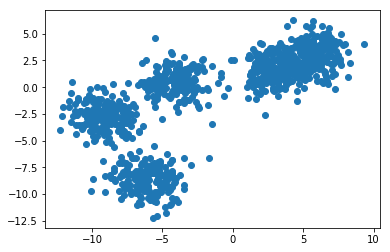

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import distance
%matplotlib inline
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$:

In [72]:
def get_random_centers(k,data):
    
    c = data.shape[1]
    
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    
    return centers

пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$:

In [196]:
def get_error(center_new,center_old):
    
    error = 0
    
    for i in range(len(center_new)):
        
        error = error + (distance.euclidean(np.nan_to_num(center_new[i]), np.nan_to_num(center_old[i]))) ** 2
        
    return error        

3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$

In [195]:
def kmeans(k, data, stop):
        
    centers = get_random_centers(k,data)
    
    centers_old = np.zeros(centers.shape)
    centers_new = np.copy(centers)
        
    n = data.shape[0]
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    error = get_error(centers_new, centers_old)
    
    while error > stop:
        
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)                    
        
        clusters = np.argmin(distances, axis = 1)

        centers_old = np.copy(centers_new)
        
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
            
        error = get_error(centers_new, centers_old)    
        
    return centers_new

Визуализировать сходимость центров кластеров:

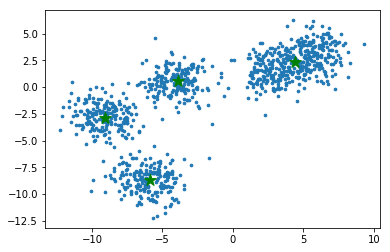

In [219]:
result_centers = kmeans(4,X,0)
plt.scatter(X[:,0], X[:,1], s=7)
plt.scatter(result_centers[:,0], result_centers[:,1], marker='*', c='g', s=150)

Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

In [191]:
def get_sse(data,centers):
    
    error = 0
    
    for j in range(len(data)):
        
        min_cluster_distance = min([distance.euclidean(np.nan_to_num(centers[i]),data[j]) for i in range(len(centers))])

        error = error + min_cluster_distance ** 2
    
    return error

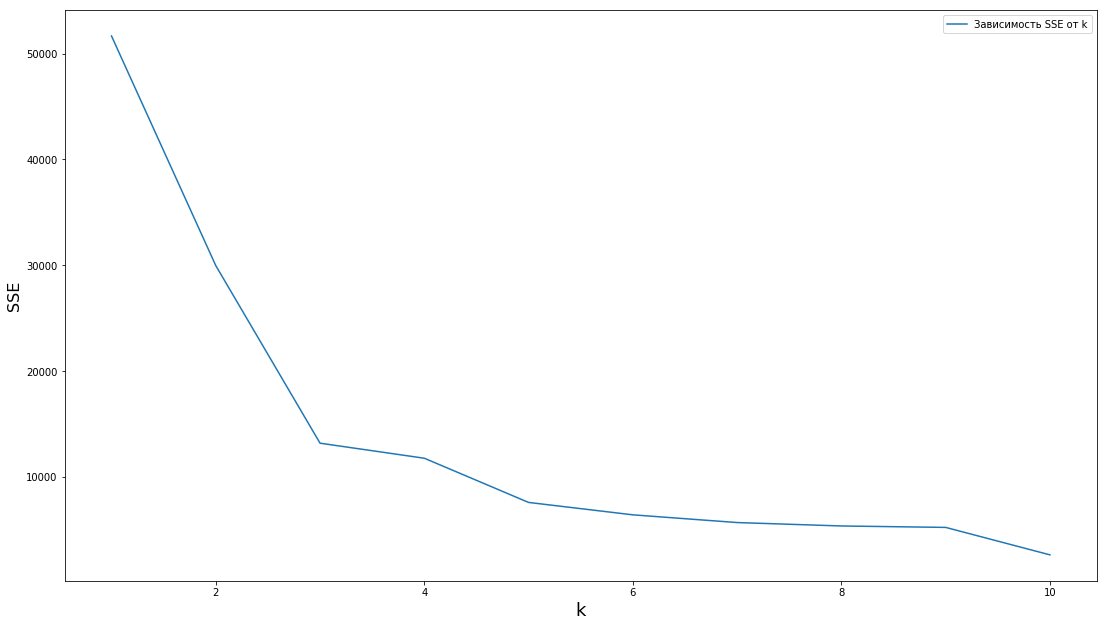

In [212]:
k = [1,2,3,4,5,6,7,8,9,10]
all_sse = [get_sse(X,kmeans(k[i],X,0)) for i in range(len(k))]

plt.plot(k,all_sse, label='Зависимость SSE от k')    
plt.xlabel('k', fontsize=18)
plt.ylabel('SSE', fontsize=16)
plt.legend()
plt.gcf().set_size_inches(18.5, 10.5)        

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [3]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [223]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(1,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

1
2
3
4
5
6
7
8
9
10


In [233]:
for i in range(len(inertia)):
    print(i+1,inertia[i]) 

1 303666.0922641994
2 238066.358092713
3 203215.59994571476
4 188096.71848079565
5 176308.28576686644
6 166868.542080106
7 160779.14871497458
8 155516.89223254204
9 150434.3482003394
10 146538.82273918454


Минимальная сумма квадратических расстояний между сэмплами и ближайшим кластером была достигнута при количестве кластеров равном десяти

In [6]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------')

In [7]:
for it in range(10):
    cls_info(df, it)

------ Кластер  0  -------
2009.0152173913043
103611.61561264822
1538.00395256917
100.52470355731225
310784.5223320158
передний    4710
Name: Привод, dtype: int64
ВАЗ          1072
Chevrolet     454
Name: Марка, dtype: int64
седан      2175
хэтчбек    1952
Name: Кузов, dtype: int64
механика    4587
автомат      255
Name: КПП, dtype: int64
---------------------------
------ Кластер  1  -------
2012.438184159691
66919.74887314874
2176.883451384417
168.2762395363812
1114996.8712169994
полный    2120
Name: Привод, dtype: int64
Toyota    410
Nissan    258
Name: Марка, dtype: int64
кроссовер    1622
седан         612
Name: Кузов, dtype: int64
автомат     2219
механика     544
Name: КПП, dtype: int64
---------------------------
------ Кластер  2  -------
2006.1973398479913
151981.77985884907
2303.257328990228
161.9885993485342
520911.6520086862
полный    1984
Name: Привод, dtype: int64
Hyundai    318
Nissan     313
Name: Марка, dtype: int64
седан        1325
кроссовер     975
Name: Кузов, dty